In [3]:
"""
Script responsável pela criação das figuras de plot

"""


'\nScript responsável pela criação das figuras de plot\n\n'

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
plot_1 = {
    "Datasets": ["Kronodroid E", "Kronodroid R"],
    "Acurácia TS-Ar": [0.887, 0.910],
    "Acurácia TR-As": [0.884, 0.914],
    "Precisão TS-Ar": [0.862, 0.888],
    "Precisão TR-As": [0.942, 0.960],
}

plot_2 = {
    "Datasets": ["Kronodroid E", "Kronodroid R"],
    "F1 TS-Ar": [0.890, 0.912],
    "F1 TR-As": [0.876, 0.909],
    "Recall TS-Ar": [0.921, 0.938],
    "Recall TR-As": [0.819, 0.864]
}

plot_3 = {
    "Datasets": ["Kronodroid E", "Kronodroid R"],
    "Acurácia TS-Ar": [0.887, 0.910],
    "Acurácia TR-As": [0.884, 0.914],
    "Precisão TS-Ar": [0.862, 0.888],
    "Precisão TR-As": [0.942, 0.960],
    "F1 TR-AR": [0.890, 0.912],
    "F1 TS-As": [0.876, 0.909],
    "Recall TR-AR": [0.921, 0.938],
    "Recall TR-As": [0.819, 0.864]
}

In [21]:
def plot_and_save_as_pdf(data, plot_name='plots',figsize=(12, 6),start_color=0):
    """
    Função de plot e salavemnto em figuras
    
    Parâmetros:
    - data: dados no formato csv
    - plot_name: nome do plot
    - figsize: tamanho da figura
    - start_color: cor inicial da figura
    
    """
    palette_color = sns.color_palette("Paired")
    palette_color = palette_color[start_color:] + palette_color[:start_color]
    # Create a DataFrame
    df = pd.DataFrame(data)

    # Melt the DataFrame
    df_melted = df.melt(id_vars="Datasets", var_name="Métrica", value_name="Valor")

    # Plotting
    plt.figure(figsize=figsize)
    ax = sns.barplot(x="Datasets", y="Valor", hue="Métrica", data=df_melted, palette=palette_color)

    # Set y-axis limit
    ax.set_ylim(0, 1)

    # Rotate x-axis labels to avoid overlap
   

    # Annotate bars with values inside the bar, on top


    for p in ax.patches:
        height = p.get_height()
        ax.annotate(format(height, '.3f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, -12), 
                    textcoords='offset points',
                    color='white', weight='bold')

    # Handle legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = []
    unique_handles = []
    for handle, label in zip(handles, labels):
        if label not in unique_labels:
            unique_labels.append(label)
            unique_handles.append(handle)
    ax.legend(unique_handles, unique_labels, title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    
    # Save plot as PDF
    plt.savefig(f"{plot_name}.pdf", format="pdf", dpi=96)
    plt.savefig(f"{plot_name}_2.pdf", format="pdf")
    # Show plot
    plt.show()

/tmp/ipykernel_6064/3308271332.py:21: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  ax = sns.barplot(x="Datasets", y="Valor", hue="Métrica", data=df_melted, palette=palette_color)


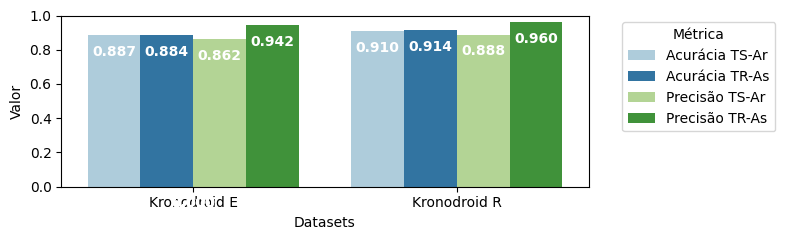

/tmp/ipykernel_6064/3308271332.py:21: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  ax = sns.barplot(x="Datasets", y="Valor", hue="Métrica", data=df_melted, palette=palette_color)


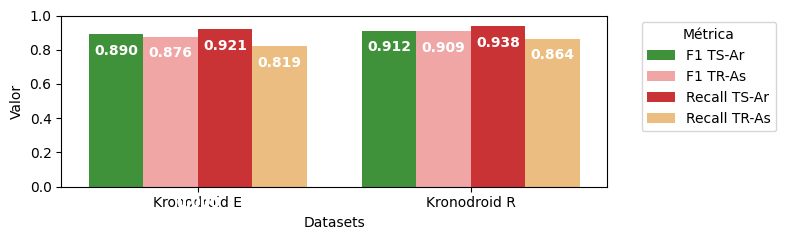

In [24]:
# Call the function to create and save the plot
plot_and_save_as_pdf(data=plot_1, plot_name='plot_1-v2', figsize=(8, 2.5), start_color=0)
plot_and_save_as_pdf(data=plot_2, plot_name='plot_2-v2', figsize=(8, 2.5),start_color=3)
